Разработать конвейер обработки данных (нужна регистрация) с использованием пройденных алгоритмов. Попробуйте использовать pipeline в построении и переборе параметров алгоритмов. 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, plot_roc_curve, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import train_test_split, cross_val_score


In [ ]:
! unzip archive.zip

Archive:  archive.zip
  inflating: creditcard.csv          


In [ ]:
df = pd.read_csv('/content/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
# удалим дубликаты 
df.drop_duplicates(inplace=True)
df.shape

(283726, 31)

In [ ]:
# количество дубликатов
284807 - 283726

1081

In [ ]:
# здесь мы можем увидеть, что целевая переменная типа int, а другие данные тип float
# пустых данных нет
df.info()
# Amount - сумма транзакций
# Class - целевая переменная
#  1 - для мошеннических транзакций, 0 - в противном случае

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [ ]:
#  убедимся, что нет пустых значений
df.isnull().value_counts()

Time   V1     V2     V3     V4     V5     V6     V7     V8     V9     V10    V11    V12    V13    V14    V15    V16    V17    V18    V19    V20    V21    V22    V23    V24    V25    V26    V27    V28    Amount  Class
False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False   False    283726
dtype: int64

In [ ]:
# баланс классов целевой переменной
df.Class.value_counts()
# видим, что из нашего датасета 473 транзакции - мошенники

0    283253
1       473
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


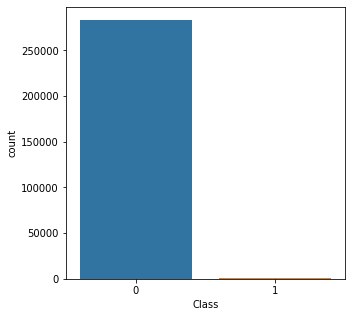

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(df['Class'])
plt.show()

In [ ]:
# посмотрим на значения каолонок (кол-во среднее мин медиана макс и тд)
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,-0.000715,0.000603,0.000252,0.001043,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,0.994674,0.995430,0.952215,0.914894,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,-0.406198,-0.647862,-0.425732,-0.581452,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,0.050209,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,0.616976,0.663178,0.492336,0.650104,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


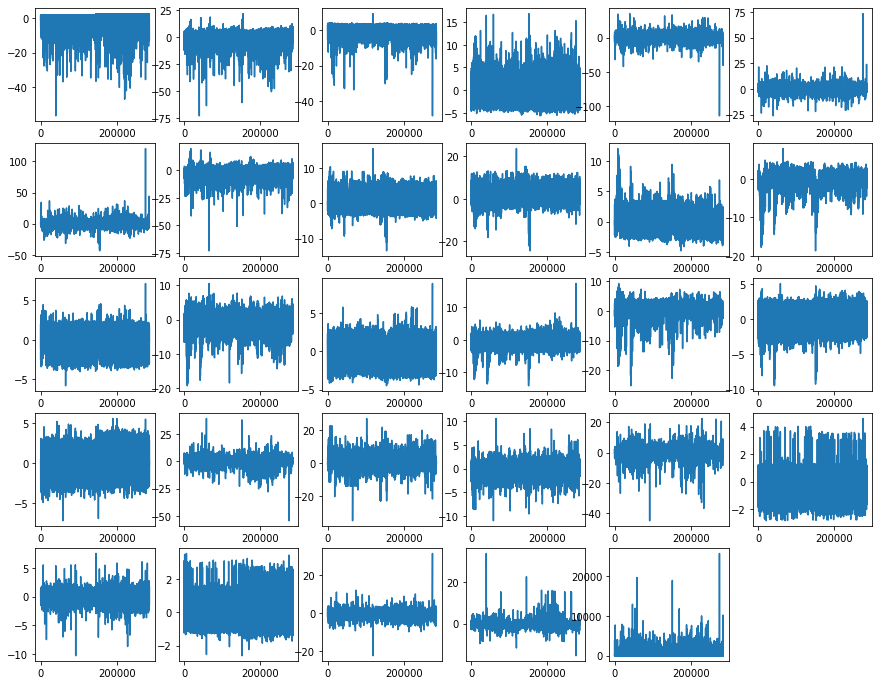

In [ ]:
# визуализируем данные

fig = plt.figure(figsize = (15, 12))

plt.subplot(5, 6, 1) ; plt.plot(df.V1) ; plt.subplot(5, 6, 15) ; plt.plot(df.V15)
plt.subplot(5, 6, 2) ; plt.plot(df.V2) ; plt.subplot(5, 6, 16) ; plt.plot(df.V16)
plt.subplot(5, 6, 3) ; plt.plot(df.V3) ; plt.subplot(5, 6, 17) ; plt.plot(df.V17)
plt.subplot(5, 6, 4) ; plt.plot(df.V4) ; plt.subplot(5, 6, 18) ; plt.plot(df.V18)
plt.subplot(5, 6, 5) ; plt.plot(df.V5) ; plt.subplot(5, 6, 19) ; plt.plot(df.V19)
plt.subplot(5, 6, 6) ; plt.plot(df.V6) ; plt.subplot(5, 6, 20) ; plt.plot(df.V20)
plt.subplot(5, 6, 7) ; plt.plot(df.V7) ; plt.subplot(5, 6, 21) ; plt.plot(df.V21)
plt.subplot(5, 6, 8) ; plt.plot(df.V8) ; plt.subplot(5, 6, 22) ; plt.plot(df.V22)
plt.subplot(5, 6, 9) ; plt.plot(df.V9) ; plt.subplot(5, 6, 23) ; plt.plot(df.V23)
plt.subplot(5, 6, 10) ; plt.plot(df.V10) ; plt.subplot(5, 6, 24) ; plt.plot(df.V24)
plt.subplot(5, 6, 11) ; plt.plot(df.V11) ; plt.subplot(5, 6, 25) ; plt.plot(df.V25)
plt.subplot(5, 6, 12) ; plt.plot(df.V12) ; plt.subplot(5, 6, 26) ; plt.plot(df.V26)
plt.subplot(5, 6, 13) ; plt.plot(df.V13) ; plt.subplot(5, 6, 27) ; plt.plot(df.V27)
plt.subplot(5, 6, 14) ; plt.plot(df.V14) ; plt.subplot(5, 6, 28) ; plt.plot(df.V28)
plt.subplot(5, 6, 29) ; plt.plot(df.Amount)
plt.show()

In [ ]:
# разделим df по значениям целевой переменной
legal = df[df['Class']==0]
no_legal = df[df['Class']==1]

In [ ]:
# узнаем процентное соотношение целевой переменной (мошенники)
tot_size = len(df)
leg_siz = len(legal)
no_leg_size = len(no_legal)
no_leg_perc = no_leg_size/leg_siz*100
no_leg_perc

0.16698852262818045

In [ ]:
# посмотрим значения суммы транзакций мошенников
legal.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
# значения суммы транзакций не мошенников
no_legal.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
# среднее значений для обоих транзакций
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,0.007663,-0.006004,0.009476,0.000762,0.011668,0.001166,0.007845,0.010963,0.005120,-0.001382,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,3.716347,-6.103254,-0.094324,-6.835946,-0.072830,-4.000956,-6.463285,-2.157071,0.669143,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


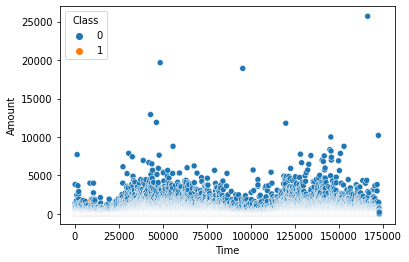

In [ ]:
# график, где значения целевой переменной отрисованы в зависимости от значений сум транзакций и времени
# транзакции от мошенников особо даже не видны
sns.scatterplot(x='Time',y='Amount',hue='Class',data=df)

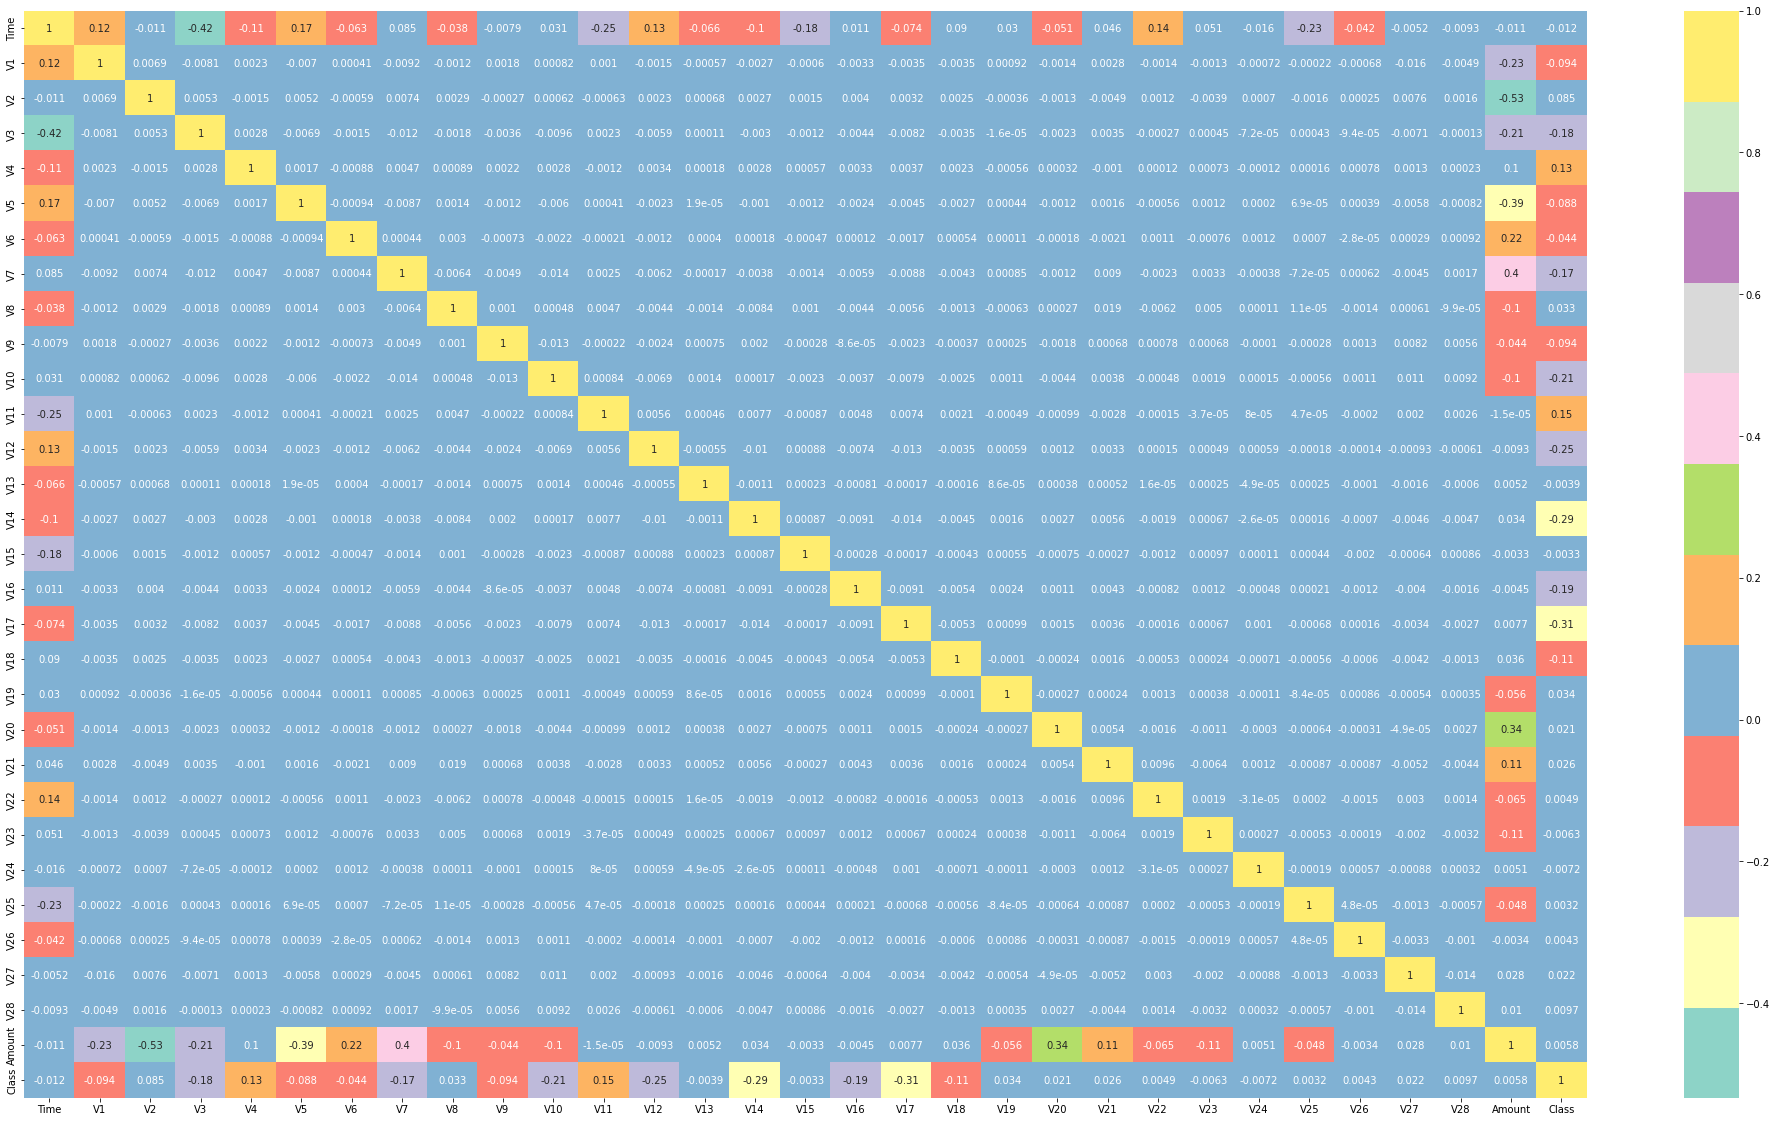

In [ ]:
# посмотрим на яркую матрицу корреляций 
plt.figure(figsize=(35,20))
sns.heatmap(df.corr(),annot=True,cmap="Set3")
plt.show()

In [ ]:
# видим, что некоторые переменные являются мультиколлинеарными между собой 
# например колонка time имеет обратную колленеальность с такими колонками как v3 
# с целевой переменной мы так же видим колленеальность например с v4, v11
#  и обратную коллениальность с v10, v12, v14, v17
# amout - v2, v5 обратная
# amount - v7, v20 прямая

In [ ]:
# посмотрим на коллениальность с целевой переменной в цифрах
var = df[df.columns[1:]].corr()['Class'][:]
var.sort_values(ascending=False)

Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64

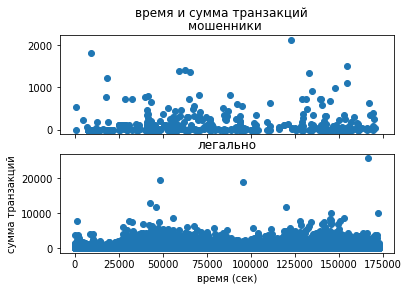

In [ ]:
# посмотрим, есть ли взаимосвязь между временем и суммами транзакций
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('время и сумма транзакций')
ax1.scatter(no_legal.Time, no_legal.Amount)
ax1.set_title('мошенники ')
ax2.scatter(legal.Time, legal.Amount)
ax2.set_title('легально')
plt.xlabel('время (сек)')
plt.ylabel('сумма транзакций')
plt.show()
# видим, что легальные трнзакции идут более-менее равномерно в отношении времени и суммы,
#  чего не скажешь о мошеннических транзакциях, которых хоть и меньше, чем легальных,
#  но тем не менее, они имеют больший разброс в данной визуализации

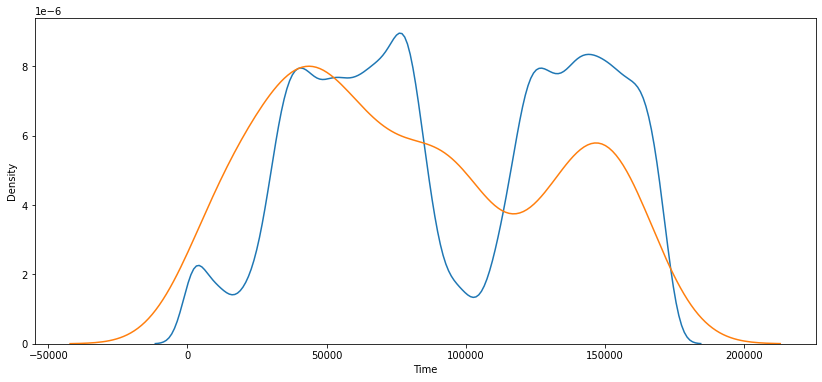

In [ ]:
# посмотрим визуально на легальные и нелегальные транзакции по времени
# видим, что у них есть взаимосвязь
fig, ax = plt.subplots(figsize = (14,6) )
sns.kdeplot(df[df['Class']==0]['Time'])
sns.kdeplot(df[df['Class']==1]['Time'])

Text(0.5, 1.0, 'boxplot amount')

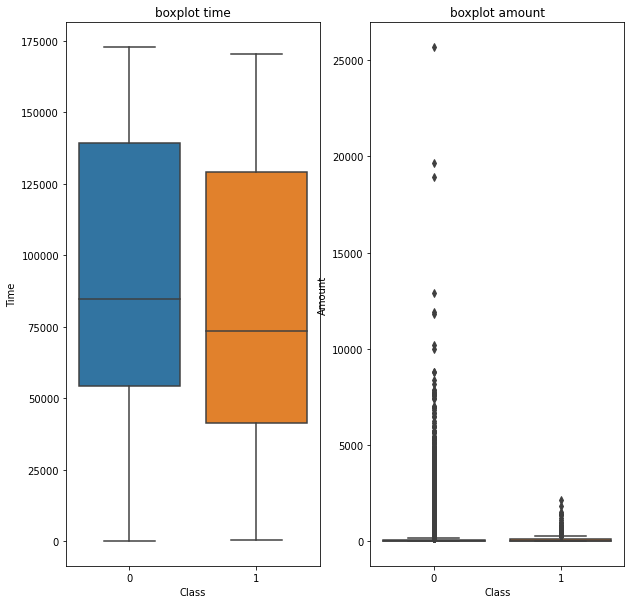

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(10,10))
sns.boxplot(x = df['Class'],y = df["Time"],ax=axes[0])
axes[0].set_title("boxplot time")
sns.boxplot(x = df['Class'],y = df['Amount'],ax=axes[1])
axes[1].set_title("boxplot amount")

In [ ]:
# Поскольку много выбросов, мы будем использовать RobustScaler вместо Standard Scaler только для Time и Amount, 
# поскольку другие уже преобразованы в PCA, поэтому в масштабировании нет необходимости.

In [ ]:
# промасштабируем выделяющиеся колонки
rbst = RobustScaler()
df['Amount'] = rbst.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = rbst.fit_transform(df['Time'].values.reshape(-1,1))

In [ ]:
X = df.drop('Class',axis=1)
Y = df['Class'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
# я не буду использовать pipline т.к. не вижу смысла
# данные уже преобразованы в PCA, поэтому в масштабировании нет необходимости
# нет смысла использовать pipline, т.к. по сути осталось только обучить модели
# попробуем посмотреть на модели разными методами
#  что-то привизуализируем,  а где-то посмотрим на цифры


In [ ]:
# LogisticRegression
model_logreg = LogisticRegression(solver='liblinear')
model_logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# train
trn_logreg_pred = model_logreg.predict(X_train)
trn_logreg_acc = accuracy_score(trn_logreg_pred, y_train)
print(round(trn_logreg_acc*100, 2))

99.92


In [ ]:
# test
tst_logreg_pred = model_logreg.predict(X_test)
tst_logreg_acc = accuracy_score(tst_logreg_pred, y_test)
print(round(tst_logreg_acc*100, 2))

99.91


Text(0.5, 1.0, 'LogisticRegression')

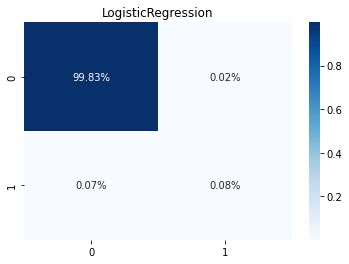

In [ ]:
cm_logreg = confusion_matrix(y_test, tst_logreg_pred)
sns.heatmap(cm_logreg/np.sum(cm_logreg), annot=True, fmt='0.2%', cmap='Blues').set_title('LogisticRegression')

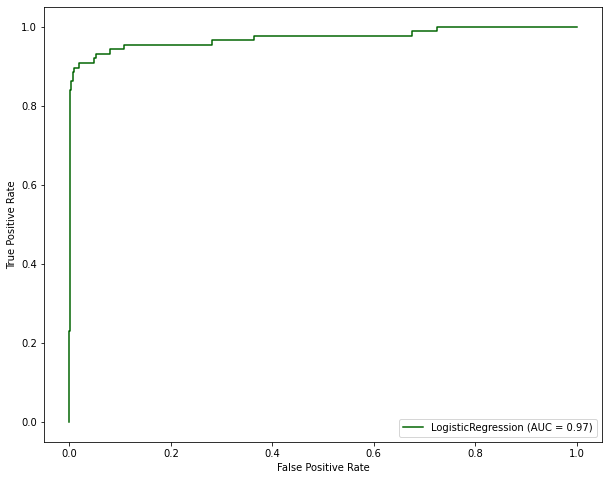

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plot_roc_curve(model_logreg, X_test, y_test, color='darkgreen', ax=ax)

In [ ]:
# DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# train
trn_tree_model_pred = tree_model.predict(X_train)
trn_tree_model_acc = accuracy_score(trn_tree_model_pred, y_train)
print(round(trn_tree_model_acc*100, 2))

99.95


In [ ]:
# test
tst_tree_model_pred = tree_model.predict(X_test)
tst_tree_model_acc = accuracy_score(tst_tree_model_pred, y_test)
print(round(tst_tree_model_acc*100, 2))

99.94


Text(0.5, 1.0, 'DecisionTreeClassifier')

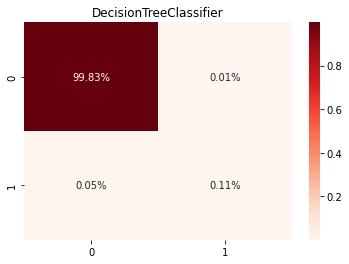

In [ ]:
cm_three = confusion_matrix(y_test, tst_tree_model_pred)
sns.heatmap(cm_three/np.sum(cm_three), annot=True, fmt='0.2%', cmap='Reds').set_title('DecisionTreeClassifier')

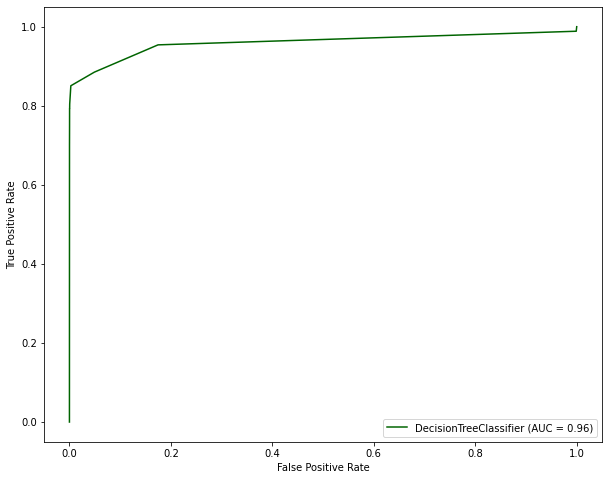

In [ ]:
# Plot Receiver operating characteristic (ROC) curve.
fig, ax = plt.subplots(figsize=(10, 8))
plot_roc_curve(tree_model, X_test, y_test, color='darkgreen', ax=ax)

In [ ]:
# SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# train
trn_svm_model_pred = svm_model.predict(X_train)
trn_svm_model_acc = accuracy_score(trn_svm_model_pred, y_train)
print(round(trn_svm_model_acc*100, 2))

99.96


In [ ]:
# test
tst_svm_model_pred = svm_model.predict(X_test)
tst_svm_model_acc = accuracy_score(tst_svm_model_pred, y_test)
print(round(tst_tree_model_acc*100, 2))

99.94


Text(0.5, 1.0, 'SVM')

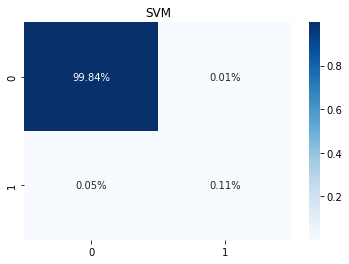

In [ ]:
cm_svm = confusion_matrix(y_test, tst_svm_model_pred)
sns.heatmap(cm_svm/np.sum(cm_svm), annot=True, fmt='0.2%', cmap='Blues').set_title('SVM')

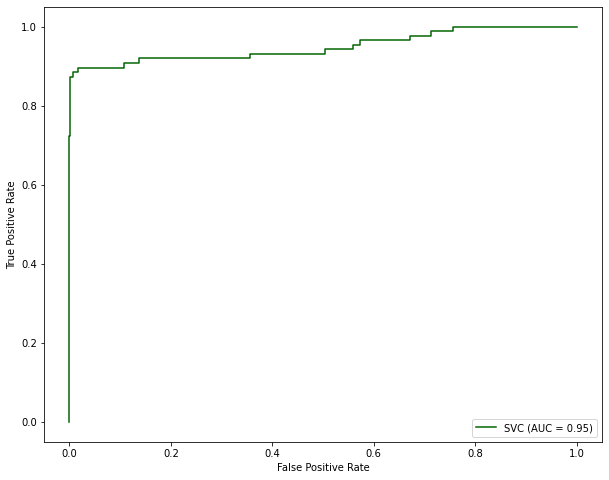

In [ ]:
# Plot Receiver operating characteristic (ROC) curve
fig, ax = plt.subplots(figsize=(10, 8))
plot_roc_curve(svm_model, X_test, y_test, color='darkgreen', ax=ax)

In [ ]:
# KNN
# посмотрим на среднее значение f1 кросс-валидации 10 выборок для модели knn 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
mean = cross_val_score(knn, X_train, y_train, scoring="f1", cv=10).mean()
print(mean)

0.8290276546760271


In [ ]:
# остальные модели прогоним через функцию для упрощения и ускорения
def predict(model,X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    print(confusion_matrix(y_test,preds))
    print(classification_report(y_test,preds))
    return accuracy_score(y_test,preds)

In [ ]:
# xgboost
xgboost_model = predict(XGBClassifier(),X_train,X_test, y_train, y_test)
xgboost_model

[[56649    10]
 [   20    67]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.87      0.77      0.82        87

    accuracy                           1.00     56746
   macro avg       0.93      0.88      0.91     56746
weighted avg       1.00      1.00      1.00     56746



0.9994713283755683

In [ ]:
# RandomForestClassifier
rf_model = predict(RandomForestClassifier(),X_train,X_test, y_train, y_test)
rf_model

[[56655     4]
 [   18    69]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.95      0.79      0.86        87

    accuracy                           1.00     56746
   macro avg       0.97      0.90      0.93     56746
weighted avg       1.00      1.00      1.00     56746



0.9996123074754167

In [ ]:
# все модели показали хорошие результаты!